# Temporal and Spatial DataMining

## Exercise_05_Similarity - Intro

In [86]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import norm
from matplotlib import cm
plt.style.use('ggplot')

In [87]:
class ExampleClass:
    def __init__(self):
        print('I run when we create an object.')
        # Saving a variable with `self.var = var` enables other methods in a class
        # to have access to that variable.
        self.variable = 'I am a variable.'       
        
    def __call__(self):
        print('I run when the object is called')
        
    def some_method(self):
        print('The variable can be accessed in this method:', self.variable)
        print('I am a method.')
        
obj = ExampleClass() # Create object out of class, calls the __init__ method
obj()                # Call the object, runs the __call__ method
obj.some_method()    # Call some_method from the object.
obj.variable         # Get the value of the variable defined in the object.

I run when we create an object.
I run when the object is called
The variable can be accessed in this method: I am a variable.
I am a method.


'I am a variable.'

### Task 1: Distance calculation

The euclidean distance of two vectors is defined as:
$$d(\mathbf{X}, \mathbf{Y})=\|\mathbf{X}-\mathbf{Y}\|_{2}=\sqrt{\left(x_{1}-y_{1}\right)^{2}+\cdots+\left(x_{n}-y_{n}\right)^{2}}=\sqrt{\sum_{i=1}^{n}\left(x_{i}-y_{i}\right)^{2}}$$


The euclidean distance is a special form of the <a href="https://en.wikipedia.org/wiki/Norm_(mathematics)#p-norm">p-norm</a>:

\begin{align}
D_{p}(\mathbf{X}, \mathbf{Y}) = (\sum_{i=1}^{N}|x_i-y_i|^{p})^{\frac{1}{p}}
\end{align}

**a)** Create the class `PNorm` that gets the value of $p$ as an initialization parameter. The `__call__` method should have two vectors as input arguments and return their distance.

In [88]:
class PNorm:
    def __init__(self, p):
        """Initialization of PNorm."""
        self.p = p
    
    def __call__(self, u, v):
        """Call method that determines the distance between u and v."""
        return np.sum(np.abs(u - v)**self.p)**(1/self.p)

**b)** Calculate the Manhattan distance (p=1) and Euclid distance (p=2) between X1 and X2:

In [89]:
np.random.seed(0)
X1 = np.random.rand(10)
X2 = np.random.rand(10)

In [90]:
manh_dist = PNorm(p=1)
euc_norm = PNorm(p=2)

print("Manhattan distance between X1 and X2:", manh_dist(X1, X2))
print("Euclidean distance between X1 and X2:", euc_norm(X1, X2))

Manhattan distance between X1 and X2: 2.9046204135831926
Euclidean distance between X1 and X2: 1.0607908079366692


The [Mahalanobis distance](https://en.wikipedia.org/wiki/Mahalanobis_distance) of two vectors $\mathbf{u}$, $\mathbf{v}$ given a covariance matrix $\mathbf{S}$ is given by:
$$\Delta(\mathbf{u}, \mathbf{v}) =  \sqrt{(\mathbf{u}-\mathbf{v})^T\mathbf{S}^{-1}(\mathbf{u}-\mathbf{v})}$$

A covariance matrix is a symmetric, positive semidefinite matrix. Use the provided matrix S:
$S=\begin{pmatrix}1 & 0.5 \\ 0.5 & 1 \end{pmatrix}$

**c)** Implement a class `Mahalanobis` that gets the matrix of $\mathbf{S}$ as an initialization parameter. The call method should get two vectors and return their distance:

In [91]:
class Mahalanobis:
    def __init__(self, S):
        """Initialization of PNorm."""
        self.S = S
    
    def __call__(self, u, v):
        """Call method that determines the distance between u and v."""
        return np.sqrt(np.dot(np.dot((u - v).T, np.linalg.inv(self.S)), (u - v)))

In [92]:
S = [[1, .5], [.5, 1]]

a, b = np.array([1, 2]), np.array([2, 1])
mahalanobis_dist = Mahalanobis(S=S)
mahalanobis_dist(a, b) # should return 2

2.0

The scaled Euclidean distance (based on the matrix norm) is given by: 

\begin{align}
D_{M}(\mathbf{x}, \mathbf{y}) = \sqrt{(\mathbf{x}-\mathbf{y})^{T}\mathbf{M}(\mathbf{x}-\mathbf{y}))}
\end{align}

with the Matrix norm:

\begin{align}
\mathbf{M} = \left(\frac{1}{N-1}\sum_{k=1}^{N}(x_k-\mu)(x_k-\mu)^{T}\right)^{-1}
\end{align}

and the mean value $$\mu = \frac{1}{N}\sum_{k=1}^{N}x_k$$. 

**c)** Implement scaled Euclidean distance in python and calculate the distance $D_{M}(\mathbf{x}_1, \mathbf{x}_2)$:

>with $x_k$ is the $k_{th}$ sample, and $N=2$.

>consider using the right dimensions

$$\mathbf{x}_1, \mathbf{x}_2 \in \mathbb{R}^n \text{ , } \mathbf{M} \in \mathbb{R}^{n \times n} \text{ and } n=10$$

In [93]:
X = np.matrix(np.concatenate((X1.reshape(1,-1), X2.reshape(1,-1)),axis=0))
X

matrix([[0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ,
         0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152],
        [0.79172504, 0.52889492, 0.56804456, 0.92559664, 0.07103606,
         0.0871293 , 0.0202184 , 0.83261985, 0.77815675, 0.87001215]])

In [136]:
class scaled_Euclid_distance():
    
    def __init__(self, X):
        """ initialization using all samples """
        self.M = self.calculate_M(X)
        print(self.M)
    
    def calculate_M(self, X):
        print(X[0].reshape(-1,1).shape)
        mean = np.mean(X, axis=0).reshape(-1, 1) # geht über samples
        print(mean.shape) #soll 2 sein
        diff = np.array([(x.reshape(-1,1) - mean) for x  in X])
        print(f"{diff.shape=}")
        temp = np.array([d @ d.T for d  in diff])
        print(f"{temp.shape=}")
        sum = np.sum(temp, axis=0)
        print(f"{sum.shape=}")
        print(sum)
        return np.linalg.inv(sum/(X.shape[0]-1))
        
    def __call__(self, X, Y):
        """ the actual function for calling the distance """
        return np.sqrt((X-Y) @ self.M @ (X-Y).T)
    
    ####################
    # Your Code Here   #
    ####################

In [137]:
X = np.concatenate((X1.reshape(1,-1), X2.reshape(1,-1)),axis=0)
scl_euc = scaled_Euclid_distance(X)

(10, 1)
(10, 1)
diff.shape=(2, 10, 1)
temp.shape=(2, 10, 10)
sum.shape=(10, 10)
[[ 0.02950301 -0.02262653 -0.0042168   0.04623984 -0.04282758 -0.06786521
  -0.05069185 -0.00718449 -0.02253077  0.05909681]
 [-0.02262653  0.01735281  0.00323396 -0.0354624   0.03284546  0.05204739
   0.03887675  0.00550995  0.01727937 -0.0453227 ]
 [-0.0042168   0.00323396  0.0006027  -0.00660896  0.00612125  0.00969983
   0.00724528  0.00102686  0.00322027 -0.00844658]
 [ 0.04623984 -0.0354624  -0.00660896  0.07247137 -0.06712335 -0.10636464
  -0.07944896 -0.0112602  -0.03531232  0.09262199]
 [-0.04282758  0.03284546  0.00612125 -0.06712335  0.06216999  0.09851547
   0.07358603  0.01042926  0.03270645 -0.08578696]
 [-0.06786521  0.05204739  0.00969983 -0.10636464  0.09851547  0.15610906
   0.1166055   0.01652635  0.05182712 -0.13593927]
 [-0.05069185  0.03887675  0.00724528 -0.07944896  0.07358603  0.1166055
   0.08709836  0.01234434  0.03871221 -0.1015397 ]
 [-0.00718449  0.00550995  0.00102686 -0.01126

In [108]:
print("scaled Euclid distance:", scl_euc(X1, X2))

scaled Euclid distance: nan


/var/folders/hk/dwphr0p14vn00wrnlw8bxjpw0000gn/T/ipykernel_3243/892479728.py:18: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((X-Y) @ self.M @ (X-Y).T)


**d)** Implement following distance measure:

*Cosine distance:* Normalized standard scalar product of two vectors (cosine of the angle):
	
$$d(\mathbf{x},\mathbf{y}) := \frac{\langle \mathbf{x} \vert \mathbf{y} \rangle}{||\mathbf{x}||\cdot||\mathbf{y}||}$$
Note: another notation for $\langle \mathbf{x} \vert \mathbf{y} \rangle$ is $\mathbf{x}^{\textrm{T}} \mathbf{y}$.

In [138]:
def cosine_similarity(u, v):
    """Compute the cosine similarity between u and v."""
    return np.dot(u, v) / (norm(u) * norm(v))

### Task 2: Plotting
Plotting is an essential tool for data visualization. 

> Use the provided `plot_distances` function to visualize your previously implemented distance functions.
> The `plot_distance` function takes an arbitrary distance function as input, which itself has two input arguments.

In [139]:
def plot_distances(distf, base=np.array([0,0])):
    """
    Plot level contours of given distance function **distf** around the development point **base**

    Parameters:
    ===========
    distf - (x,y) -> d A function taking two arrays and returning a positive distance measure.

    base - base point to develop the contour lines around.
    """
    X, Y = np.mgrid[-3:3:0.1, -3:3:0.1]
    Z = np.zeros_like(X)

    for i,_ in enumerate(X):
        for j,_ in enumerate(Y):
            x = X[i,j]
            y = Y[i,j]
            pt = np.asarray([x,y])
            Z[i,j] = distf(pt, base)

    levels = np.arange(0,6,0.25)

    CS = plt.contour(X, Y, Z, levels=levels)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.grid(True)

**a)** For the p-norm try different values for the value of `p` and plot the distance using the method `plot_distance`.

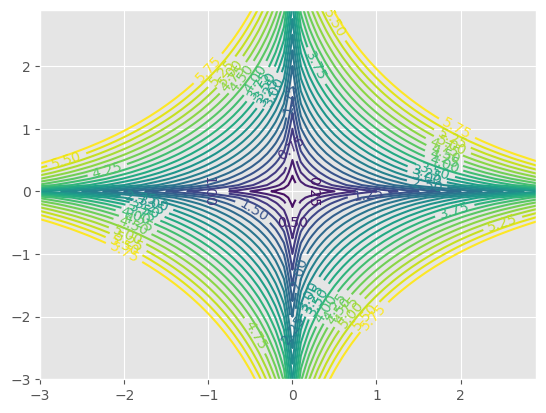

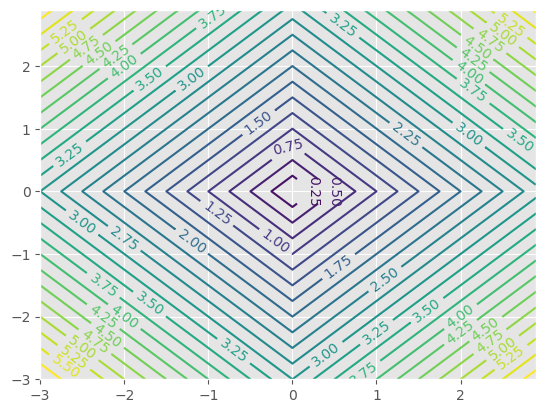

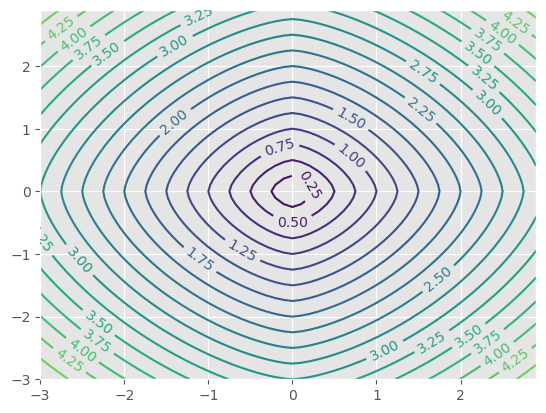

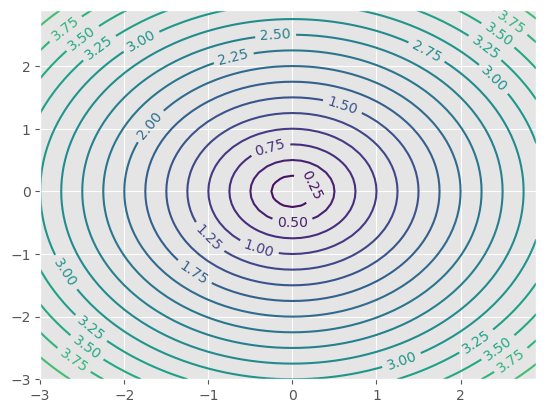

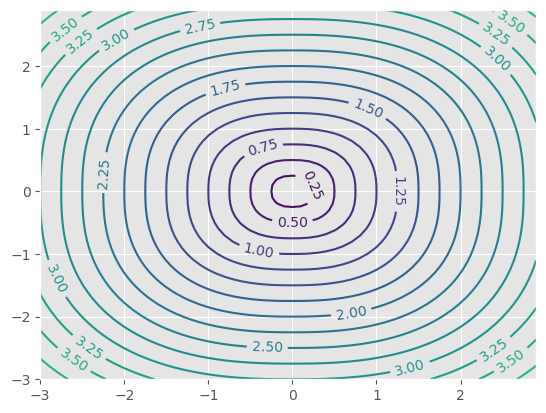

In [142]:
for p in np.arange(0.5, 3, 0.5):
    plot_distances(PNorm(p=p))
    plt.show()

**b)** For the Mahalanobis distance try different values for the covariance matrix `S` and plot the distance using the method `plot_distance`. 

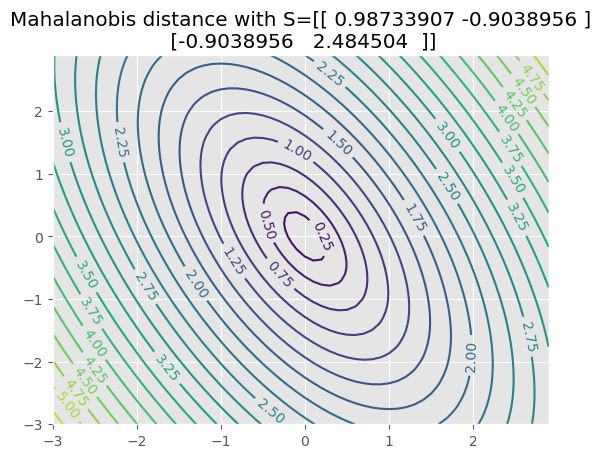

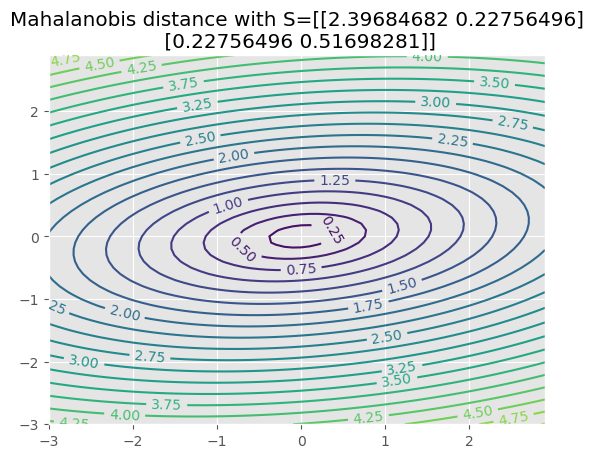

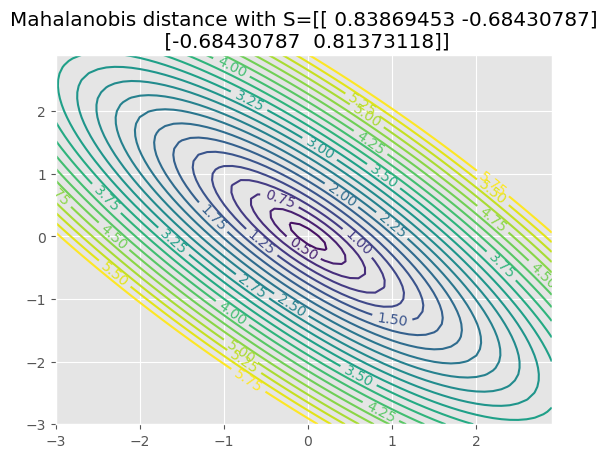

In [143]:
for i in range(2, 5):
    # covariance matrix is symmetric and positive definite
    x = np.random.randn(8).reshape(2, 4)
    S = np.cov(x)
    plot_distances(distf=Mahalanobis(S=S))
    plt.title('Mahalanobis distance with S={}'.format(S))
    plt.show()